# Projeto de Métodos Numéricos

### Aluno: Fernando do Rego Pessoa de Macedo Neto

### O objetivo do projeto é de prever o avanço do covid-19 no estado de Pernambuco:
#### Para isso eu utilizei um conjunto de EDOs da seguinte forma:

*Observações importantes*     
Alguns dados que utilizei para chegar aos meus resultados estarão no final do jupyter-notebook na célula de fontes    
O tempo(t) será medido em dias      
A população inicial será igual a 9616621 pessoas   
A infecção começou no dia 12/03 com um casal infectado, ou seja: I(0) = 2
Farei cálculos das taxas médias me baseando nos dados pesquisados e tentando adequar o meu gráfico ao máximo ao real



#### taxas:
beta = taxa de transmissão da doença     
gama = taxa de recuperação da doença     
omega = taxa de mortalidade da doença        

#### equações:
I(t) = Infectados no momento t       
dI/dt = beta * I - gama * I - omega * I

M(t) = Total de mortos no momento t       
dM/dt = omega * I

R(t) = Recuperados no momento t       
dR/dt = gama * I

#### cálculos das taxas:
As taxas não são constantes, se você analizar o gráfico real dos casos, as taxas variam bastante, pois dependem bastante da quantidade de infectados, porém complicaria muito         
      
      

Observando os dados de base percebemos que a infecção se espalha rápidamente até aproximadamente o dia 20/05( t = 69 ) quando atinge algo em torno de 26000 casos e então o número de casos por dia começa a cair significativamente. Minha suposição é que o motivo tenha sido de o secretário de saúde anunciou que se a população respeitasse o isolamento, em Junho o estado já poderia retomar suas atividades.         

Na metade de junho(aproximadamente 15/06, t = 95 ), com aproximadamente 46000 casos, a taxa de infectados por dia volta a subir rápidamente. Se quiser saber a minha suposição, é que as pessoas viram que não tinha como o anúncio do secretário da saúde se tornar verdade(mas o que importa para os cálculos são os dados, as suposições são só possíveis explicações para os ocorridos).   

Em torno do dia 01/08( t = 142 ) a taxa de infecção começou a despencar, o número de infectados era de aproximadamente 78000 e a pesar de sempre haverem quedas e picos, essa foi a última mudança significativa dessa taxa, além de ser a última que utilizarei.   
Os dados mais recentes até o momento que estou terminando o trabalho são de 13/11( t = 246 ), com um total de 169000 infectados.

Nestas datas o total de mortos era:     
t = 69    ->  2000 mortos             
t = 95    ->  4000 mortos                
t = 142   ->  6600 mortos     
t = 246   ->  8800 mortos     

E por último temos a taxa de recuperação, como é a que tenho menos dados eu deixarei ela constante, pois isso fará com que seja mais fácil trabalhar para encontrar o valor das outras duas taxas, e seu valor será o total de recuperados dividido pelo total de casos até então.             


infectados em t = 69: 26014
mortos em t = 69: 2081
infectados em t = 95: 46652
mortos em t = 95: 4006
infectados em t = 142: 78017
mortos em t = 142: 6609
infectados em t = 246: 169385
mortos em t = 246: 8802


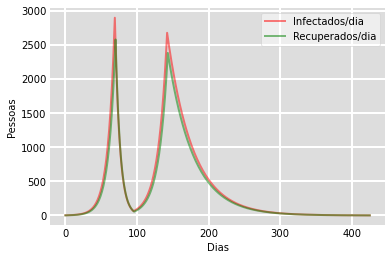

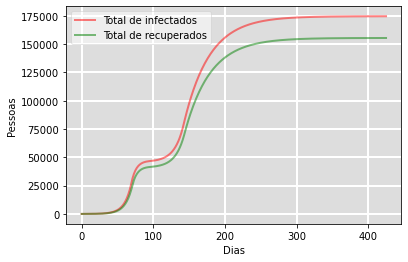

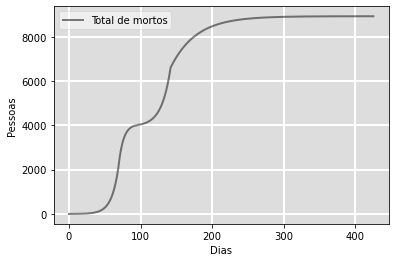

a pandemia acaba quando t = 423 ou seja, no dia 09/05/2021
total de infectados = 174551
total de recuperados = 155349
total de mortos = 8926


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

################################################## funcao da data ############################################################
#calcula a data do dia t
def calldia(t):
    d,m,a = 12,3,2020
    for i in range(t):
        if(m == 2):
            if(d < 28):
                d += 1
            else:
                d = 1
                m += 1
        elif(m==4 or m==6 or m==9 or m==11):
            if(d<30):
                d+=1
            else:
                d=1
                m+=1
        else:
            if(d<31):
                d+=1
            elif(m!=12):
                d=1
                m+=1
            else:
                d=1
                m=1
                a+=1
    if(d<10):
        dia = '0'+str(d)
    else:
        dia = str(d)
    if(m<10):
        mes = '0'+str(m)
    else:
        mes = str(m)
    return dia + '/' + mes + '/' + str(a)
#     return str(d)+'/'+str(m)+'/'+str(a)

################################################# funcoes das taxas ##########################################################
# chance de uma pessoa ser infectada
def beta(t):
    if t < 69:
        return 1.08124
    if t < 95:
        return 0.846
    if t < 142:
        return 1.0563
    return 0.8863

# taxa de recuperacao
gama = 0.89

# taxa de mortalidade de da doenca
def omega(t):
    if t < 69:
        return 0.08
    if t < 95:
        return 0.0933
    if t < 142:
        return 0.083
    return 0.024 # a taxa de obitos permanecera a mesma


############################################## inicializar as variaveis #######################################################  
dias = 425
populacao = 9616621
t = np.linspace(0, dias, dias+1)
s = np.zeros(dias+1)
i = np.zeros(dias+1)
r = np.zeros(dias+1)
m = np.zeros(dias+1)
pop = np.zeros(dias+1)
itot = np.zeros(dias+1)
mtot = np.zeros(dias+1)
rtot = np.zeros(dias+1)

############################################## setar condicoes iniciais #######################################################  

i[0] = 2
r[0] = 0
m[0] = 0
itot[0] = 0
mtot[0] = 0
rtot[0] = 0

################################################ calculo das funcoes #########################################################  
n = 0
for n in range(dias):
    dm = i[n] * omega(n)
    dr = i[n] * gama
    di = i[n] * beta(n) - dr - dm
    
    
    i[n+1] = i[n] + di 
    r[n+1] =  dr
    m[n+1] = m[n] + dm
    rtot[n+1] = rtot[n] + r[n]
    itot[n+1] = itot[n] + i[n]
    mtot[n+1] = mtot[n] + dm


print('infectados em t = 69:', int(itot[69]))
print('mortos em t = 69:', int(m[69]))
print('infectados em t = 95:', int(itot[95]))
print('mortos em t = 95:', int(m[95]))
print('infectados em t = 142:', int(itot[142]))
print('mortos em t = 142:', int(m[142]))
print('infectados em t = 246:', int(itot[246]))
print('mortos em t = 246:', int(m[246]))
################################################# plotar os graficos #########################################################   
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, i, 'r', alpha=0.5, lw=2, label='Infectados/dia')
ax.plot(t, r, 'g', alpha=0.5, lw=2, label='Recuperados/dia')
ax.set_xlabel('Dias')
ax.set_ylabel('Pessoas')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# print('o total de mortos foi',int(mtot[n]))
fig2 = plt.figure(facecolor = 'w')
bx = fig2.add_subplot(111,facecolor = '#dddddd', axisbelow = True)
bx.plot(t,itot,'r', alpha=0.5, lw=2, label = 'Total de infectados')
bx.plot(t,rtot,'g', alpha=0.5, lw=2, label = 'Total de recuperados')
bx.set_xlabel('Dias')
bx.set_ylabel('Pessoas')
bx.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = bx.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig3 = plt.figure(facecolor = 'w')
cx = fig3.add_subplot(111,facecolor = '#dddddd', axisbelow = True)
cx.plot(t,mtot,'k', alpha=0.5, lw=2, label = 'Total de mortos')
cx.set_xlabel('Dias')
cx.set_ylabel('Pessoas')
cx.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = cx.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
fim = 150
while(i[fim]>1):
    fim += 1
data = calldia(fim)
print('a pandemia acaba quando t =',fim,'ou seja, no dia',data)
print('total de infectados =', int(itot[n]))
print('total de recuperados =', int(rtot[n]))
print('total de mortos =', int(mtot[n]))

# Conclusão
Segundo este modelo, se continuarmos nesse rítmo a pandemia acabará completamente no dia 09/05/2021, e haverá um total de 174551 infectados e 8926 mortos.      


# Fontes:

### População de PE
https://g1.globo.com/pe/pernambuco/noticia/2020/08/27/pernambuco-atinge-96-milhoes-de-habitantes-em-2020-estima-ibge.ghtml

### Primeiros casos do covid em PE
https://www.folhape.com.br/noticias/casal-do-recife-sao-primeiros-casos-de-coronavirus-em-pernambuco/133219/

### Taxa de transmissão
https://veja.abril.com.br/saude/covid-19-brasil-completa-um-mes-com-taxa-de-transmissao-inferior-a-1/#:~:text=Para%20a%20epidemia%20em%20um,93%20pessoas%2C%20em%20progress%C3%A3o%20decrescente.

### Dados sobre o covid em PE 
**Dados que foram analizados para a aproximação das taxas de mortalidade e de transmissão**         
https://especiais.g1.globo.com/bemestar/coronavirus/estados-brasil-mortes-casos-media-movel/?&_ga=2.243313932.804817475.1605217230-2121986992.1591274899#/

### Anúncio do secretário de saúde
https://g1.globo.com/pe/pernambuco/noticia/2020/05/15/se-populacao-aderir-ao-isolamento-na-quarentena-pernambuco-pode-reabrir-todas-atividades-em-junho-diz-secretario.ghtml

### Quantidade atual de casos do coronavírus
**Dados analizados para a aproximação da taxa de recuperação:**               
https://dados.seplag.pe.gov.br/apps/corona.html           
https://covid.saude.gov.br/      
https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F01hdpp&gl=BR&ceid=BR%3Apt-419              
http://monitorcovid.com.br/                    
https://www.brasildefatope.com.br/2020/08/04/pernambuco-volta-a-bater-recorde-de-novos-casos-de-covid-19-ritmo-de-mortes-cai     

